In [1]:
# import necessary modules
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.shape

(5572, 5)

### Steps to perform:

1. Data Cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [6]:
# Renaming the Columns name
df.rename(columns={'v1':'output','v2': 'sms'}, inplace=True)

In [7]:
df.sample(5)

,output,sms
1466,ham,Your account has been refilled successfully by...
4335,ham,"Fyi I'm taking a quick shower, be at epsilon i..."
2772,ham,Still in customer place
717,ham,Book which lesson? then you msg me... I will c...
1505,ham,Total video converter free download type this ...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['output']=encoder.fit_transform(df['output']) # 0 for ham and 1 for spam

In [10]:
df.head()

,output,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking missing value
df.isnull().sum()

output    0
sms       0
dtype: int64

In [12]:
# check for duplicate value
df.duplicated().sum()

403

In [13]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2. EDA 

In [16]:
# first we check how many percent of our data is spam or not spam
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt

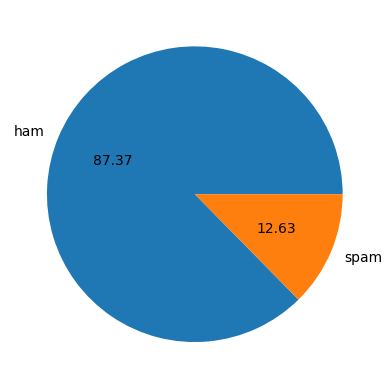

In [18]:
plt.pie(df['output'].value_counts(), labels = ['ham','spam'], autopct='%0.2f')
plt.show()

Here, we can see that in our data we have 87.37% not spam sms and 12.63% spam sms. 
This conclude that we have imbalance data

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# number of character
df['num_characters']=df['sms'].apply(len)

In [22]:
df

,output,sms,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
# nums of words
df['num_words']=df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,output,sms,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#num of sentences 
df['num_sentences']=df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,output,sms,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df.describe()

,output,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [28]:
# for ham or not spam messages
df[df['output']==0].describe()

,output,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [29]:
# for spam messages
df[df['output']==1].describe()

,output,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

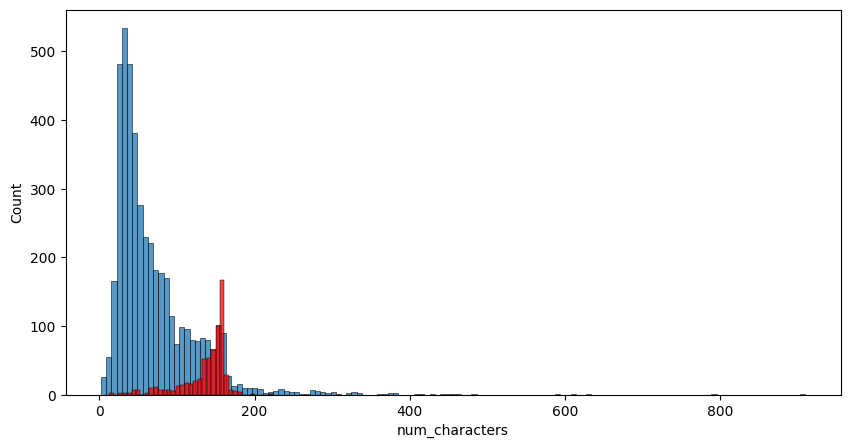

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['output']==0]['num_characters'])
sns.histplot(df[df['output']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

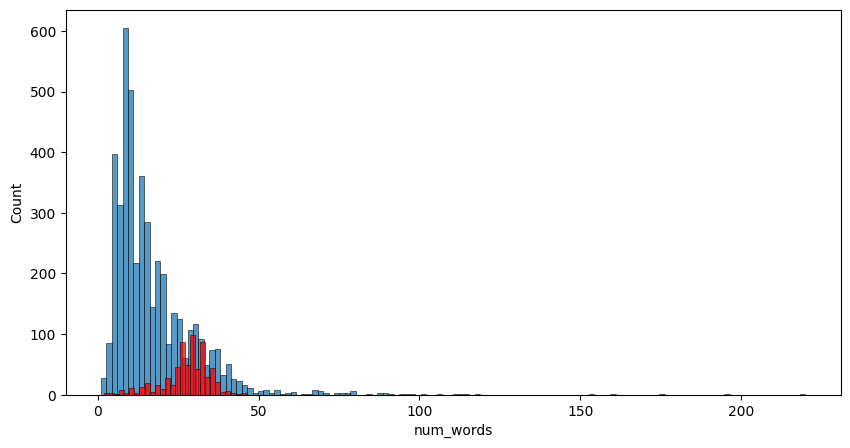

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['output']==0]['num_words'])
sns.histplot(df[df['output']==1]['num_words'], color='red')

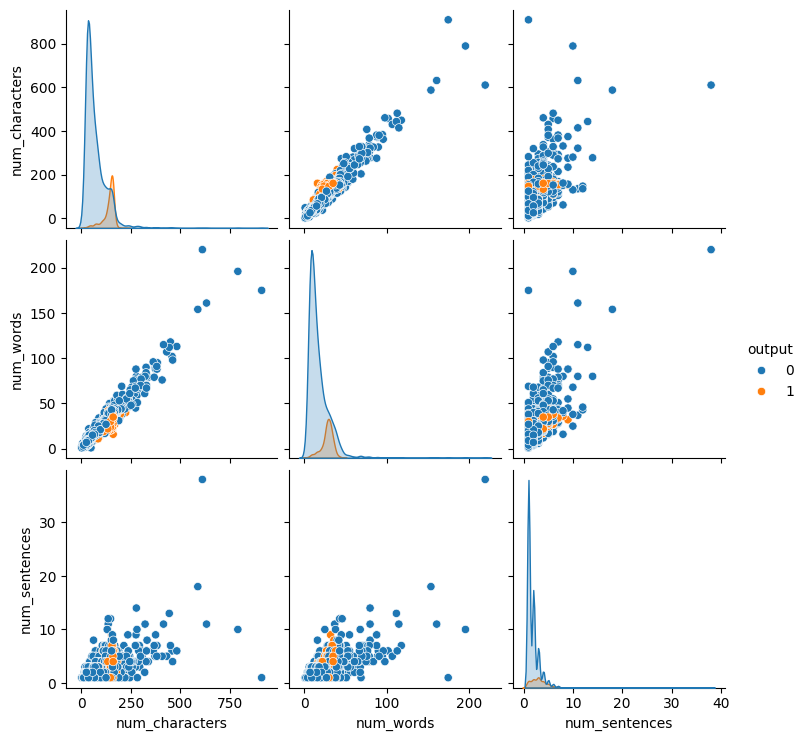

In [33]:
sns.pairplot(df,hue='output')

<Axes: >

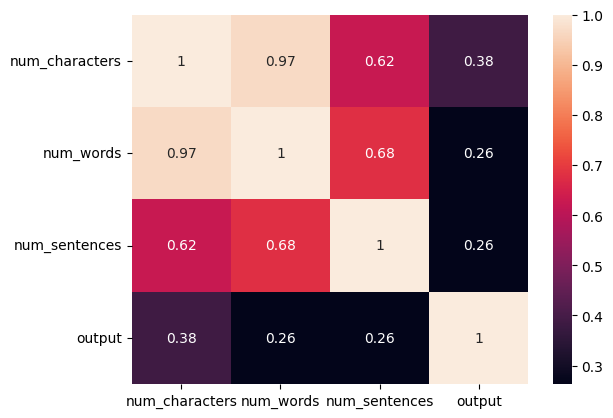

In [34]:
sns.heatmap(df[['num_characters','num_words','num_sentences','output']].corr(), annot=True)

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing the special character
* Removing stopwords and punctuation
* Stemming

In [35]:
from nltk.corpus import stopwords

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
import string

In [38]:
def data_preprocess(text):
    #1. lower case
    text = text.lower()
    #2. tokenization
    text = nltk.word_tokenize(text)
    #3. removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)
    text = y[:]
    y.clear()
    # 4. Stemming
    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)

In [39]:
data_preprocess("FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv")

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [40]:
df['sms'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [41]:
df['preprocessed_text'] = df['sms'].apply(data_preprocess)

In [42]:
df.head()

,output,sms,num_characters,num_words,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='black')

In [50]:
spam_wc = wc.generate(df[df['output']==1]['preprocessed_text'].str.cat(sep = " "))

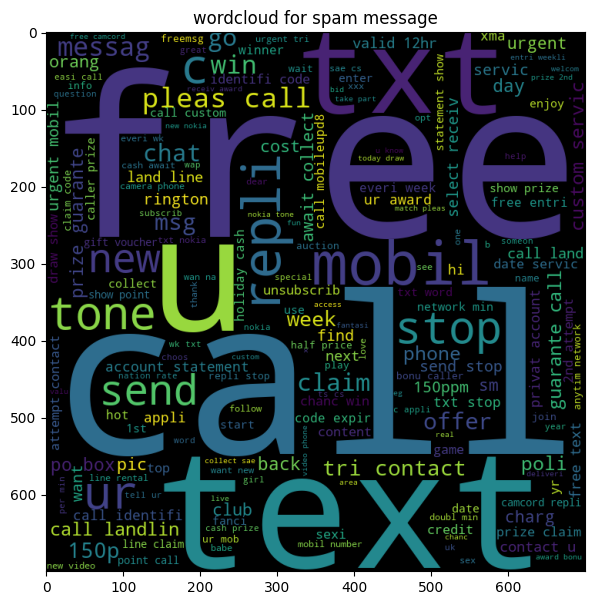

In [51]:
plt.figure(figsize=(7,7))
plt.title("wordcloud for spam message")
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['output']==0]['preprocessed_text'].str.cat(sep = " "))

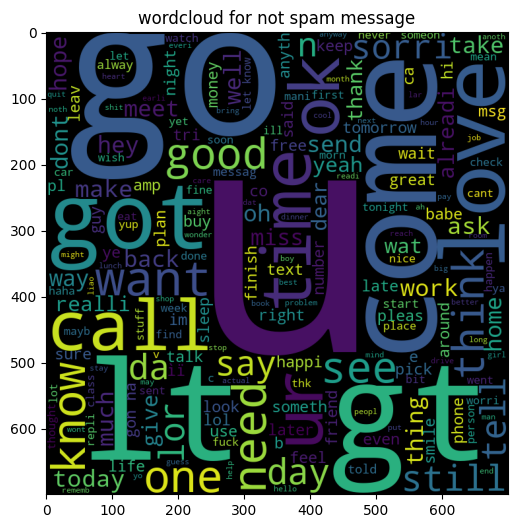

In [53]:
plt.figure(figsize=(6,6))
plt.title("wordcloud for not spam message")
plt.imshow(ham_wc)

In [54]:
spam_corpus = []
for msg in df[df['output']==1]['preprocessed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [55]:
len(spam_corpus)

9939

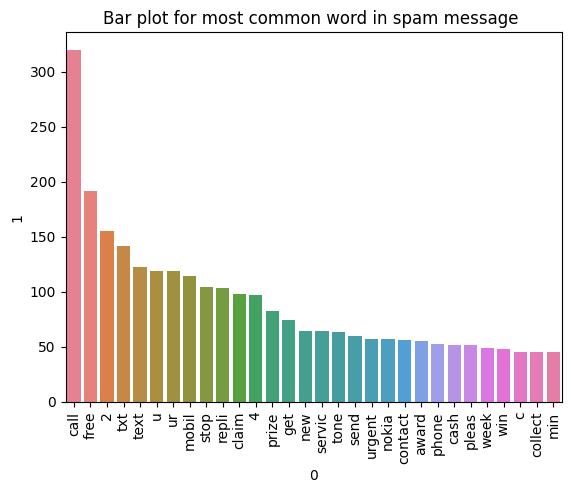

In [57]:
from collections import Counter

sns.barplot(data = pd.DataFrame(Counter(spam_corpus).most_common(30)), x=0,y=1,hue=0)
plt.xticks(rotation='vertical')
plt.title("Bar plot for most common word in spam message ")
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['output']==0]['preprocessed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

35404

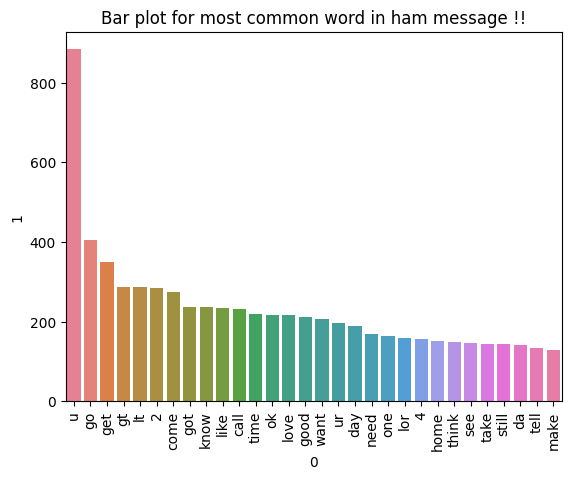

In [60]:
sns.barplot(data = pd.DataFrame(Counter(ham_corpus).most_common(30)), x=0,y=1,hue=0)
plt.xticks(rotation='vertical')
plt.title("Bar plot for most common word in ham message !!")
plt.show()

## 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# experiment
tf= TfidfVectorizer()

In [62]:
X = cv.fit_transform(df['preprocessed_text']).toarray()
X_tf = tf.fit_transform(df['preprocessed_text']).toarray()

In [63]:
X.shape

(5169, 6708)

In [68]:
X_tf.shape

(5169, 6708)

In [64]:
y=df['output'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_tf_train,X_tf_test,y_tf_train,y_tf_test = train_test_split(X_tf,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
print('Using CountVectorizer :  ')
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score of GaussianNB: ",accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print("------------------------------------------------------------------------------------------------------------")
print('Using Tfidf Vectorizer: ')
gnb.fit(X_tf_train,y_tf_train)
y_tf_pred1 = gnb.predict(X_tf_test)
print("Accuracy Score of GaussianNB: ",accuracy_score(y_tf_test, y_tf_pred1))
print(confusion_matrix(y_tf_test, y_tf_pred1))
print(precision_score(y_tf_test, y_tf_pred1))

Using CountVectorizer :  
Accuracy Score of GaussianNB:  0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315
------------------------------------------------------------------------------------------------------------
Using Tfidf Vectorizer: 
Accuracy Score of GaussianNB:  0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [73]:
print('Using CountVectorizer :  ')
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score of MultinomialNB: ",accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

print('Using Tfidf Vectorizer: ')
mnb.fit(X_tf_train,y_tf_train)
y_tf_pred2 = mnb.predict(X_tf_test)
print("Accuracy Score of MultinomialNB: ",accuracy_score(y_tf_test, y_tf_pred2))
print(confusion_matrix(y_tf_test, y_tf_pred2))
print(precision_score(y_tf_test, y_tf_pred2))

Using CountVectorizer :  
Accuracy Score of MultinomialNB:  0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153
Using Tfidf Vectorizer: 
Accuracy Score of MultinomialNB:  0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [74]:
print('Using CountVectorizer :  ')
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score of BernoulliNB: ",accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print("--------------------------------------------------------------------------------------------")
print()
print('Using Tfidf Vectorizer: ')
bnb.fit(X_tf_train,y_tf_train)
y_tf_pred3 = bnb.predict(X_tf_test)
print("Accuracy Score of BernoulliNB: ",accuracy_score(y_tf_test, y_tf_pred3))
print(confusion_matrix(y_tf_test, y_tf_pred3))
print(precision_score(y_tf_test, y_tf_pred3))

Using CountVectorizer :  
Accuracy Score of BernoulliNB:  0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
--------------------------------------------------------------------------------------------

Using Tfidf Vectorizer: 
Accuracy Score of BernoulliNB:  0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


* Since we know that precision is more important than accuracy for this type of project because data is imbalanced and we don't want to label a message spam if it is not.
 (Precision indicates how many of the predicted positive instances are relevant or correct which means how many msg are those which our model says are spam and they are spam.)


__From now I am continuing with tfidf vectorizer because this is the first vectorizer that help me to complete my aim first.__

## 5. Improvement and Evaluation

In [76]:
# trying another models for improvement
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [77]:
lr = LogisticRegression(solver='liblinear', penalty = 'l1')
svc = SVC(kernel='sigmoid', gamma = 1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()

In [78]:
clfs = {
    'Logistic Regression': lr,
    'SVC':svc,
    'DecisionTreeClassfier': dtc,
    'KNeighborsClassifier': knc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier': gbc,
    'XGBClassifier': xgb,
    'MultinomialNB':mnb
}

In [79]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [80]:
# checking
train_classifier(svc,X_tf_train,y_tf_train,X_tf_test,y_tf_test)

(0.9729206963249516, 0.9741379310344828)

In [83]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    accuracy, precision = train_classifier(clf,X_tf_train,y_tf_train,X_tf_test,y_tf_test)

    print("For ", name, 'Accuracy is ', accuracy, 'and precision is ', precision)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    

For  Logistic Regression Accuracy is  0.9516441005802708 and precision is  0.94
For  SVC Accuracy is  0.9729206963249516 and precision is  0.9741379310344828
For  DecisionTreeClassfier Accuracy is  0.9361702127659575 and precision is  0.8461538461538461
For  KNeighborsClassifier Accuracy is  0.9003868471953579 and precision is  1.0
For  RandomForestClassifier Accuracy is  0.971953578336557 and precision is  1.0
For  AdaBoostClassifier Accuracy is  0.9613152804642167 and precision is  0.9454545454545454
For  BaggingClassifier Accuracy is  0.9584139264990329 and precision is  0.8625954198473282
For  ExtraTreesClassifier Accuracy is  0.9729206963249516 and precision is  0.9824561403508771
For  GradientBoostingClassifier Accuracy is  0.9526112185686654 and precision is  0.9238095238095239
For  XGBClassifier Accuracy is  0.9729206963249516 and precision is  0.9435483870967742
For  MultinomialNB Accuracy is  0.9593810444874274 and precision is  1.0


In [110]:
# Now using just 3500 features
tfidf1 = TfidfVectorizer(max_features=3500)

In [111]:
X_tf1 = tfidf1.fit_transform(df['preprocessed_text']).toarray()

In [112]:
X_tf1_train,X_tf1_test,y_tf1_train,y_tf1_test = train_test_split(X_tf1,y,test_size=0.2,random_state=2)

In [113]:
mnb = MultinomialNB()

In [114]:
mnb.fit(X_tf1_train,y_tf1_train)
y_pred = mnb.predict(X_tf1_test)
print("Accuracy Score of MultinomialNB: ",accuracy_score(y_tf1_test, y_pred))
print(confusion_matrix(y_tf1_test, y_pred))
print(precision_score(y_tf1_test, y_pred))

Accuracy Score of MultinomialNB:  0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [87]:
print("Using only 3500 features ----->>>>.")
accuracy_scores_3500 = []
precision_scores_3500 = []

for name,clf in clfs.items():
    accuracy, precision = train_classifier(clf,X_tf1_train,y_tf1_train,X_tf1_test,y_tf1_test)

    print("For ", name, 'Accuracy is ', accuracy, 'and precision is ', precision)
    
    accuracy_scores_3500.append(accuracy)
    precision_scores_3500.append(precision)

Using only 3500 features ----->>>>.
For  Logistic Regression Accuracy is  0.9545454545454546 and precision is  0.9595959595959596
For  SVC Accuracy is  0.9758220502901354 and precision is  0.9747899159663865
For  DecisionTreeClassfier Accuracy is  0.9294003868471954 and precision is  0.8155339805825242
For  KNeighborsClassifier Accuracy is  0.9052224371373307 and precision is  1.0
For  RandomForestClassifier Accuracy is  0.971953578336557 and precision is  0.990990990990991
For  AdaBoostClassifier Accuracy is  0.9671179883945842 and precision is  0.9814814814814815
For  BaggingClassifier Accuracy is  0.9574468085106383 and precision is  0.8615384615384616
For  ExtraTreesClassifier Accuracy is  0.9796905222437138 and precision is  0.975609756097561
For  GradientBoostingClassifier Accuracy is  0.9477756286266924 and precision is  0.9285714285714286
For  XGBClassifier Accuracy is  0.965183752417795 and precision is  0.925
For  MultinomialNB Accuracy is  0.9700193423597679 and precision is

In [90]:
# appending another column with X 
X = np.hstack((X_tf1, df['num_characters'].values.reshape(-1,1)))

In [91]:
y = df['output'].values

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [93]:
print("Using appending another column ----->>>>.")
accuracy_scores_another_column = []
precision_scores_another_column = []

for name,clf in clfs.items():
    accuracy, precision = train_classifier(clf,X_tf1_train,y_tf1_train,X_tf1_test,y_tf1_test)

    print("For ", name, 'Accuracy is ', accuracy, 'and precision is ', precision)
    
    accuracy_scores_another_column.append(accuracy)
    precision_scores_another_column.append(precision)

Using appending another column ----->>>>.
For  Logistic Regression Accuracy is  0.9545454545454546 and precision is  0.9595959595959596
For  SVC Accuracy is  0.9758220502901354 and precision is  0.9747899159663865
For  DecisionTreeClassfier Accuracy is  0.9294003868471954 and precision is  0.8282828282828283
For  KNeighborsClassifier Accuracy is  0.9052224371373307 and precision is  1.0
For  RandomForestClassifier Accuracy is  0.971953578336557 and precision is  0.990990990990991
For  AdaBoostClassifier Accuracy is  0.9671179883945842 and precision is  0.9814814814814815
For  BaggingClassifier Accuracy is  0.9574468085106383 and precision is  0.8615384615384616
For  ExtraTreesClassifier Accuracy is  0.9796905222437138 and precision is  0.975609756097561
For  GradientBoostingClassifier Accuracy is  0.9477756286266924 and precision is  0.9285714285714286
For  XGBClassifier Accuracy is  0.965183752417795 and precision is  0.925
For  MultinomialNB Accuracy is  0.9700193423597679 and precis

In [95]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(),
                               'Accuracy':accuracy_scores,
                               "Precision": precision_scores, 
                               'Accuracy-3500': accuracy_scores_3500,
                               'Precision-3500': precision_scores_3500,
                               'Accuracy-another-column': accuracy_scores_another_column,
                               'Precision-another-column': precision_scores_another_column})

In [97]:
performance_df.sort_values('Precision-3500', ascending=False)

,Algorithms,Accuracy,Precision,Accuracy-3500,Precision-3500,Accuracy-another-column,Precision-another-column
3,KNeighborsClassifier,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000
10,MultinomialNB,0.959381,1.000000,0.970019,1.000000,0.970019,1.000000
4,RandomForestClassifier,0.971954,1.000000,0.971954,0.990991,0.971954,0.990991
5,AdaBoostClassifier,0.961315,0.945455,0.967118,0.981481,0.967118,0.981481
7,ExtraTreesClassifier,0.972921,0.982456,0.979691,0.975610,0.979691,0.975610
1,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790
0,Logistic Regression,0.951644,0.940000,0.954545,0.959596,0.954545,0.959596
8,GradientBoostingClassifier,0.952611,0.923810,0.947776,0.928571,0.947776,0.928571
9,XGBClassifier,0.972921,0.943548,0.965184,0.925000,0.965184,0.925000
6,BaggingClassifier,0.958414,0.862595,0.957447,0.861538,0.957447,0.861538


In [102]:
# now using Voting Classifier
svc = SVC(kernel = 'sigmoid',gamma = 1.0, probability=True)
rf = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()


from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('rf',rf),('abc',abc),('etc',etc),('mnb',mnb)], voting='soft')

In [103]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('mnb', MultinomialNB())],
                 voting='soft')

In [104]:
y_pred  = voting.predict(X_test)
print("Accuracy using voting classifier:", accuracy_score(y_test,y_pred))
print('Precision score using voting classifier: ', precision_score(y_test,y_pred))

Accuracy using voting classifier: 0.9497098646034816
Precision score using voting classifier:  1.0


In [105]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0, probability=True)
#rf = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()


In [106]:
estimators=[('svm',svc),('abc',abc),('etc',etc),('mnb',mnb)]
final_estimator = RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [109]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy using Stacking:", accuracy_score(y_test,y_pred))
print('Precision score using Stacking : ', precision_score(y_test,y_pred))

Accuracy using Stacking: 0.9787234042553191
Precision score using Stacking :  0.9328358208955224


In [116]:
import pickle
pickle.dump(tfidf1,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))